In [1]:
#!pip install mlflow

In [2]:
import mlflow
import mlflow.sklearn

In [3]:
import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns
%pip install scikit-plot
%pip install -U imbalanced-learn
import warnings
warnings.filterwarnings('ignore')
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
%matplotlib inline
from function_aux import calcular_media_individual_por_chave, format_dict, format_list
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.feature_selection import VarianceThreshold, SelectKBest, RFE, f_classif
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, confusion_matrix, precision_recall_curve, average_precision_score, accuracy_score, roc_curve, auc, roc_auc_score

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [4]:
file_paths = ['C:/Users/bruno/Documents/trabalho_final/breast-cancer.csv']

# De uma entrada para escolher o dataset a ser carregado
print('Please choose a dataset to load:')
for i, file_path in enumerate(file_paths):
    print(f'{i+1}. {file_path}')

selection = int(input()) - 1
selected_file_path = file_paths[selection]
dados = pd.read_csv(selected_file_path)

Please choose a dataset to load:
1. C:/Users/bruno/Documents/trabalho_final/breast-cancer.csv
1


In [5]:
dados.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
dados.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [8]:
dados = dados.drop(['id'], axis=1)

In [9]:
dados.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Distribuição de Cancer de mama Malignos 1.0 Benignos 0.0 : 
diagnosis
B    357
M    212
Name: count, dtype: int64


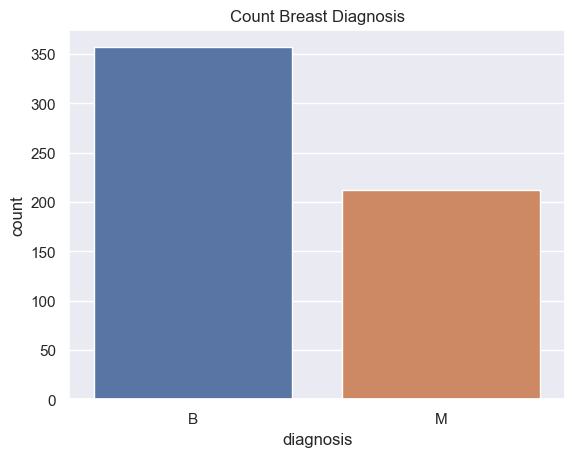

In [10]:
print("Distribuição de Cancer de mama Malignos 1.0 Benignos 0.0 : ")
print(dados["diagnosis"].value_counts())

sns.set(style='darkgrid')
sns.countplot(x = 'diagnosis',
              data = dados,
              order = dados['diagnosis'].value_counts().index)
plt.title("Count Breast Diagnosis")
plt.show()

In [11]:
label_encoder = LabelEncoder()

dados['diagnosis'] = label_encoder.fit_transform(dados['diagnosis'])

In [12]:
skb = SelectKBest(score_func=f_classif)
rfe = RFE(estimator=LogisticRegression())
var_thr = VarianceThreshold(threshold = 0.01)
combined_features = FeatureUnion([("skb", skb), ("rfe", rfe)])

In [13]:
params = {
    'Logistic Regression' : {
        'combined_features__skb__k':[3, 7],
        'combined_features__rfe__n_features_to_select':[3, 5],
        'classifier__C':  [0.01, 1.0, 100]
        },

    'Gaussian Naive Bayes' : {
        'combined_features__skb__k':[3, 7],
        'combined_features__rfe__n_features_to_select':[3, 5],
        'classifier__var_smoothing' : [10**(-9)]
        },

    'Suport Vector Machines' : [{
        'combined_features__skb__k':[3, 7],
        'combined_features__rfe__n_features_to_select':[3, 5],
        'classifier__kernel': ['rbf'], 'classifier__gamma': [2 ** (i - 15) for i in range(0, 19, 6)],
        'classifier__C': [2 ** (i - 5) for i in range(0, 21, 6)]},
        {'classifier__kernel': ['linear'], 'classifier__C': [2 ** (i - 5) for i in range(0, 21, 6)]}],

    'Multilayered Perceptron' : {
        'combined_features__skb__k':[3, 7],
        'combined_features__rfe__n_features_to_select':[3, 5],
        'classifier__hidden_layer_sizes': [(200,50, 30), (100,50),(200,100),(50,), (100,)],
        'classifier__activation': ['tanh', 'relu'],
        'classifier__solver': ['sgd', 'adam'],
        'classifier__alpha': [0.0001, 0.05],
        'classifier__learning_rate': ['constant', 'adaptive']
    },

    'CatBoost Classifier'  : {
        'combined_features__skb__k':[3, 7],
        'combined_features__rfe__n_features_to_select':[3, 5],
        "classifier__verbose" : [0],
        "classifier__depth" : [3, 8, 12],
        "classifier__learning_rate" : [0.01, 0.1, 0.2],
        "classifier__l2_leaf_reg" : [1,9],
        "classifier__iterations" : [70, 200,300]
    },

    'Random Forest' : {
        'combined_features__skb__k':[3, 7],
        'combined_features__rfe__n_features_to_select':[3, 5],
        'classifier__n_estimators': [200, 500],
        'classifier__max_features': ['sqrt', 'log2'],
        'classifier__max_depth' : [4,8],
        'classifier__criterion' :['gini', 'entropy']
    }
}


In [14]:
def get_pipeline(cls):
    return Pipeline([('scaler', MinMaxScaler()),
                     ('var', var_thr),
                     ('combined_features', combined_features),
                     ('classifier', cls)])

In [15]:
X = (dados.drop(columns=['diagnosis'])).values
y = (dados['diagnosis']).values

In [16]:
random_state = np.arange(10)

In [18]:
all_y_prob_results = {}

for rng in random_state:
    models = [
        ('Gaussian Naive Bayes', get_pipeline(GaussianNB())),
        ('Random Forest', get_pipeline(RandomForestClassifier(random_state=rng))),
        ('Logistic Regression', get_pipeline(LogisticRegression(random_state=rng))),
        ('Multilayered Perceptron', get_pipeline(MLPClassifier(random_state=rng))),
    ]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=rng, stratify=y)

    n_folds = 5
    skfold = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=rng)

    mean_fpr = np.linspace(0, 1, 100)
    best_estimators = {}

    folder_name_cm = f"confusion_matrix_{rng}"
    folder_name_roc = f"roc_curve_{rng}"  
    folder_name_pr = f"precision_recall_curve_{rng}"

    for name, model in models:
        print('running ', name)

        tpr_list = []
        auc_scores = []
        precision_list = []
        recall_list = []
        average_precision_list = []
        cm_total = np.zeros((2, 2))
        y_prob_fold_results = {}
        metrics_values = {'accuracy_test': [], 'f1_test': [], 'recall_test': [], 'precision_test': [], 'roc_auc_test': []}


        mlflow.start_run(run_name=f"Run {name} for random state {rng}", nested=True)
        mlflow.log_param("model", name)

        hyperparameters = params[name]
        gs_mdl = GridSearchCV(model, param_grid=hyperparameters, scoring='f1', cv=10).fit(X_train, y_train)
        model_mdl = gs_mdl.best_estimator_
        best_estimators[name] = model_mdl

        mlflow.sklearn.log_model(model_mdl, f"{name}_random_state_{rng}")
        
        for fold, (train_index, test_index) in enumerate(skfold.split(X, y)):
            X_train, X_test = [X[i] for i in train_index], [X[i] for i in test_index]
            y_train, y_test = [y[i] for i in train_index], [y[i] for i in test_index]

            y_pred_train_mdl = np.round(model_mdl.predict(X_train))

            y_pred_mdl = model_mdl.predict(X_test)

            metrics_values['accuracy_test'].append(accuracy_score(y_test, y_pred_mdl))
            metrics_values['f1_test'].append(f1_score(y_test, y_pred_mdl))
            metrics_values['recall_test'].append(recall_score(y_test, y_pred_mdl))
            metrics_values['precision_test'].append(precision_score(y_test, y_pred_mdl))
            metrics_values['roc_auc_test'].append(roc_auc_score(y_test, y_pred_mdl))

            y_prob = model_mdl.predict_proba(X_test)[:, 1]
            fpr, tpr, _ = roc_curve(y_test, y_prob)
            roc_auc = auc(fpr, tpr)
            auc_scores.append(roc_auc)
            tpr_list.append(np.interp(mean_fpr, fpr, tpr))
            y_prob = model_mdl.predict_proba(X_test)[:, 1]
            y_prob_fold_results[fold] = np.round(y_prob, decimals=2)
            precision, recall, _ = precision_recall_curve(y_test, y_prob)
            average_precision = average_precision_score(y_test, y_prob)

            precision_list.append(precision)
            recall_list.append(recall)
            average_precision_list.append(average_precision)

            # Calcule a matriz de confusão para o fold atual
            cm_total += confusion_matrix(y_test, y_pred_mdl)

        all_y_prob_results[(name, rng)] = y_prob_fold_results
        select_combined = model_mdl.steps[2][1]
        select_combined.fit(X_train, y_train)
        selected_indices_kbest = select_combined.transformer_list[0][1].get_support(indices=True)
        selected_indices_rfe = select_combined.transformer_list[1][1].get_support(indices=True)
        column_names_skb = dados.columns.tolist()
        selected_column_names_skb = [column_names_skb[i] for i in selected_indices_kbest]
        column_names_rfe = dados.columns.tolist()
        selected_column_names_rfe = [column_names_rfe[i] for i in selected_indices_rfe]

        combined_indices = set(selected_indices_kbest).union(selected_indices_rfe)
        column_names = dados.columns.tolist()
        selected_column_names = [column_names[i] for i in combined_indices]
        selected_column_names

        mlflow.log_param("Modelo", name)
        mlflow.log_param("Random_State", str(rng))
        mlflow.set_tag("Features_SKB", format_list(selected_column_names_skb))
        mlflow.set_tag("Features_RFE", format_list(selected_column_names_rfe))
        mlflow.set_tag("Features_Combined", format_list(selected_column_names))
        mlflow.log_param("Parâmetros", format_dict(gs_mdl.best_params_))

        # Calculate and log mean and standard deviation for each metric
        mlflow.log_metric("accuracy_test_mean", np.mean(metrics_values['accuracy_test']))
        mlflow.log_metric("f1_test_mean", np.mean(metrics_values['f1_test']))
        mlflow.log_metric("recall_test_mean", np.mean(metrics_values['recall_test']))
        mlflow.log_metric("precision_test_mean", np.mean(metrics_values['precision_test']))
        mlflow.log_metric("roc_auc_test_mean", np.mean(metrics_values['roc_auc_test']))

        mlflow.log_metric("accuracy_test_std", np.std(metrics_values['accuracy_test']))
        mlflow.log_metric("f1_test_std", np.std(metrics_values['f1_test']))
        mlflow.log_metric("recall_test_std", np.std(metrics_values['recall_test']))
        mlflow.log_metric("precision_test_std", np.std(metrics_values['precision_test']))
        mlflow.log_metric("roc_auc_test_std", np.std(metrics_values['roc_auc_test']))

        # Save confusion matrix
        fig, ax = plt.subplots(figsize=(8, 6))
        sns.heatmap(cm_total, annot=True, fmt=".0f", cmap="Blues", cbar=False, ax=ax)
        ax.set_xlabel('Predicted')
        ax.set_ylabel('Actual')
        ax.set_title(f'Confusion Matrix: {name} - Random State {rng}')
        ax.set_xticklabels([0, 1])
        ax.set_yticklabels([0, 1])
        plt.tight_layout()
        plt.savefig(f'{folder_name_cm}/{name}_cm_total.png')
        plt.close()
        mlflow.log_artifact(f'{folder_name_cm}/{name}_cm_total.png')

        # Save ROC curve
        plt.figure(figsize=(8, 6))
        for i, tpr in enumerate(tpr_list):
            plt.plot(mean_fpr, tpr, label=f'Fold {i + 1} (AUC = {auc_scores[i]:.2f})')
        plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Aleatório')
        plt.xlabel('Taxa de Falsos Positivos')
        plt.ylabel('Taxa de Verdadeiros Positivos')
        plt.title(f'Curva ROC para {name} - Random State {rng}')
        plt.legend()
        plt.tight_layout()
        plt.savefig(f'{folder_name_roc}/{name}_roc_curve_{rng}.png')
        plt.close()
        mlflow.log_artifact(f'{folder_name_roc}/{name}_roc_curve_{rng}.png')

        # Save Precision-Recall curve
        plt.figure(figsize=(8, 6))
        for i, (precision, recall) in enumerate(zip(precision_list, recall_list)):
            plt.plot(recall, precision, label=f'Fold {i + 1} (AP = {average_precision_list[i]:.2f})')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title(f'Precision-Recall Curve for {name} - Random State {rng}')
        plt.legend()
        plt.tight_layout()
        plt.savefig(f'{folder_name_pr}/{name}_precision_recall_curve_{rng}.png')
        plt.close()
        mlflow.log_artifact(f'{folder_name_pr}/{name}_precision_recall_curve_{rng}.png')

    mlflow.end_run()

running  Gaussian Naive Bayes


MlflowException: The configured tracking uri scheme: 'file' is invalid for use with the proxy mlflow-artifact scheme. The allowed tracking schemes are: {'https', 'http'}